In [135]:
import re                                                        
import os 
import pandas as pd
import numpy as np
from pandas import ExcelWriter


new_activ_dir = '/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda'
os.chdir(new_activ_dir)
topic_file_all = pd.read_excel('30_topics_news_body.xlsx')
topic_file_all.drop(['num_topic'], axis = 1, inplace = True)
news_df_lda = pd.read_excel('/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/1_0_all_corpus/3_n_gram_replaced_news_df.xlsx')
news_df_lda.drop(['newsbody', 'newsbody_replaced_words', 'publication', 'heading', 'dateTime',
                  'newsbody_n_gram_replaced',
                  'aadhaar_count', 'newsbody_n_gram_replaced'], axis = 1, inplace = True)
topic_file_all = pd.merge(topic_file_all, news_df_lda, on='doc_no')
LDA_topics = pd.read_excel('/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda/LDA_topics.xlsx')
topic_file_all = pd.merge(topic_file_all, LDA_topics, on='topic')
topic_file_all.head()

,doc_no,topic,newsbody_lda,dateTime,publication,heading,aadhaar_count,len_docs,newsbody_original,article_length,year_quarter,topic_html,topic_name,topic_expand,topic_text
0,1,10,fix annual cap six subsidy lpg_cylinder house_...,2012-11-06,1,Hot air on LPG \n,1,231,After fixing an annual cap of six subsidised L...,500,2012.4,23,aadhaar_direct_benefit_transfer,LPG _subsidy,subsidy consumer lpg not cylinder scheme bank...
1,18,10,kick_start district aadhaar penetrationthe gov...,2012-12-12,1,Direct cash transfer for LPG from Jan: Oil Sec...,4,112,To kick-start in 20 districts with 80% Aadhaar...,258,2012.4,23,aadhaar_direct_benefit_transfer,LPG _subsidy,subsidy consumer lpg not cylinder scheme bank...
2,20,10,government start pay cash_subsidy domestic coo...,2012-12-12,1,Direct cash transfer for LPG from January \n,3,180,The Government will start paying cash subsidy ...,382,2012.4,23,aadhaar_direct_benefit_transfer,LPG _subsidy,subsidy consumer lpg not cylinder scheme bank...
3,22,10,subject diesel subsidy fuel major debate outsi...,2012-12-14,1,Technology to fuel solutions \n,1,435,"Over the past few years, the subject of diesel...",865,2012.4,23,aadhaar_direct_benefit_transfer,LPG _subsidy,subsidy consumer lpg not cylinder scheme bank...
4,57,10,railway passenger fare hike eyes ruling congre...,2013-01-14,1,Chintan Shivir portents \n,1,277,"After last week's rail passenger fare hikes, a...",665,2013.1,23,aadhaar_direct_benefit_transfer,LPG _subsidy,subsidy consumer lpg not cylinder scheme bank...


In [86]:
## gensim topic modeling part 1 ( preparation of corpus for building the model )
# Import required packages
import gensim
import numpy as np
import logging
import pyLDAvis.gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


def compute_sub_topic_coherence_values(df, df_topic_col, df_text_col, main_topic_num_list, start, limit, step):
    for original_topic in main_topic_num_list:
        news_df_for_topic_an = df[df[df_topic_col]==original_topic].copy()
        print((len(news_df_for_topic_an), original_topic))
        news_df_for_topic_an = news_df_for_topic_an.reset_index(drop=True)
        news_df_for_topic_an.head(n=2)
        data = news_df_for_topic_an[df_text_col].values.tolist()
        data_words = list(sent_to_words(data))
        ##Create a dictionary representation of the documents.
        dictionary = Dictionary(data_words)
        #dictionary.filter_extremes(no_below=10, no_above=0.2)
        #Create dictionary and corpus required for Topic Modeling
        corpus = [dictionary.doc2bow(word) for word in data_words]
        coherence_values = []
        model_list = []
        for num_topics in range(start, limit, step):
            model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, update_every=0,passes=20 )
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=data_words, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())
        # Show graph
        xnew = []
        c_values = []
        
        for num_topics in range(start, limit, step):
            xnew.append (num_topics)
        for c_val in coherence_values:
            c_values.append (c_val)
        for ite in range (0 , len(c_values)):
            y_max = max(c_values)
            if c_values [ite ] == y_max:   
                print('original_topic =', original_topic, 'num_topics = ', 
                      xnew[ite], 'cohenrence_value =', y_max )
        
        plt.plot(xnew, c_values)
        plt.xlabel("Num Topics")
        plt.ylabel("Coherence score")
        plt.legend(("coherence_values"), loc='best')
        plt.show()
    return 0

(309, 0)
original_topic = 0 num_topics =  3 cohenrence_value = 0.38668565181931286


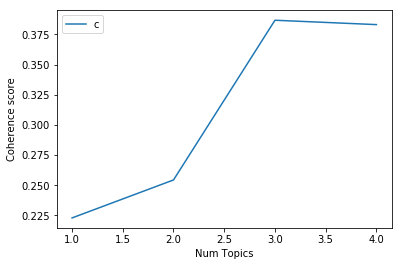

(340, 22)
original_topic = 22 num_topics =  4 cohenrence_value = 0.29217935835882036


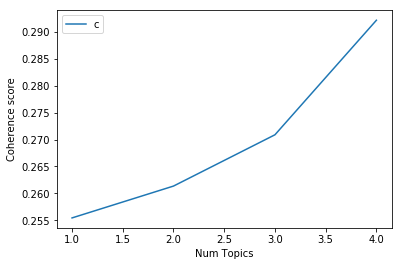

(264, 24)
original_topic = 24 num_topics =  3 cohenrence_value = 0.5956951778530764


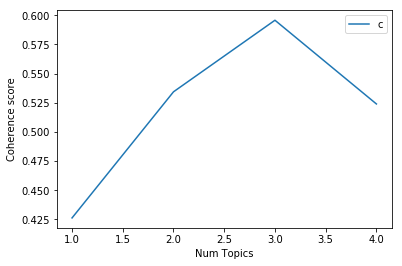

0

In [79]:
compute_sub_topic_coherence_values(topic_file_all, 'topic', 'newsbody_lda', [0,22,24], 1,5,1 )

In [90]:
def tokenizer_tf_idf(text):
    word_vector = text.split()
    return word_vector


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import lda
import logging
import pyLDAvis
logging.getLogger("lda").setLevel(logging.WARNING)


cvectorizer = CountVectorizer(max_features=30000, ngram_range=(1,1))
main_topic_num_list = [0,22,24] 

for original_topic in main_topic_num_list:
    news_df_for_topic_an = topic_file_all[topic_file_all['topic']==original_topic].copy()
    print((len(news_df_for_topic_an), original_topic))
    news_df_for_topic_an = news_df_for_topic_an.reset_index(drop=True)
    cvz = cvectorizer.fit_transform(news_df_for_topic_an['newsbody_lda'])
    vocab = cvectorizer.get_feature_names()
    activ_dir  = '/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda/lda_topic_unknown'
    os.chdir(activ_dir)
    count_topics = [3]
    dict_dfs = []
    list_dfs = []

    for n_topics in count_topics:
        name_0 = './pyldadavis_' + str(original_topic) + '_' + str(n_topics)
        name = name_0 + '.html'
        name_csv = name_0 +'.csv'
        print('n_topics = ', n_topics )
        n_iter = 1500
        lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
        X_topics = lda_model.fit_transform(cvz)
        n_top_words = 20
        topic_summaries = []

        topic_word = lda_model.topic_word_  # get the topic words
        vocab = cvectorizer.get_feature_names()

        topic_file = []

        for i, topic_dist in enumerate(topic_word):
            topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
            topic_summaries.append(' '.join(topic_words))
            top = 'Topic {}: {}'.format(i, ' '.join(topic_words))
            topic_file.append(dict(topic = i, topic_name = top))

        topic_file = pd.DataFrame(topic_file)

        topic_file.to_csv(name_csv)

        from sklearn.manifold import TSNE
        tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
        tsne_lda = tsne_model.fit_transform(X_topics)
        doc_topic = lda_model.doc_topic_
        lda_keys = []

        for i, tweet in enumerate(news_df_for_topic_an['newsbody_lda']):
            lda_keys += [doc_topic[i].argmax()]

        lda_df = pd.DataFrame(tsne_lda, columns=['x','y'])
        lda_df['doc_no'] = news_df_for_topic_an['doc_no']
        lda_df['sub_topic'] = lda_keys
        #Preparing Lda_df
        news_df_for_topic_an['tokens'] = news_df_for_topic_an['newsbody_lda'].map(tokenizer_tf_idf)
        lda_df['len_docs'] = news_df_for_topic_an['tokens'].map(len)
        list_dfs.append(lda_df)
        dict_dfs.append(dict(num_topic =n_topics,  Lda_df = lda_df, topics = topic_file))
        def prepareLDAData():
            data = {
            'vocab': vocab,
            'doc_topic_dists': lda_model.doc_topic_,
            'doc_lengths': list(lda_df['len_docs']),
            'term_frequency':cvectorizer.vocabulary_,
            'topic_term_dists': lda_model.components_
            } 
            return data
        import pyLDAvis
        ldadata = prepareLDAData()

        pyLDAvis.enable_notebook()
        prepared_data = pyLDAvis.prepare(**ldadata)
        pyLDAvis.save_html(prepared_data,name)


        print('############################################')


    count_topic_files = len(dict_dfs)
    print(count_topic_files)

    iter = 0
    while iter < count_topic_files:
        name_xl = str(original_topic)+ '_' + str(dict_dfs[iter]['num_topic'])+ '_topics' + '_news_body'+'.xlsx'
        print(name_xl)
        s = dict_dfs[iter]['Lda_df'].copy(deep=True)
        s.drop(['x', 'y' ], axis = 1, inplace = True)
        s['num_topic']= iter
        writer = pd.ExcelWriter(name_xl)
        s.to_excel(writer, sheet_name='phase_1')
        writer.save()
        print(iter)
        iter = iter+1



(309, 0)
n_topics =  3
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 309 samples in 0.000s...
[t-SNE] Computed neighbors for 309 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 309 / 309
[t-SNE] Mean sigma: 0.085318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.612915
[t-SNE] Error after 1000 iterations: 0.246776
############################################
1
0_3_topics_news_body.xlsx
0
(340, 22)
n_topics =  3
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 340 samples in 0.000s...
[t-SNE] Computed neighbors for 340 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 340 / 340
[t-SNE] Mean sigma: 0.073131
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.208130
[t-SNE] Error after 900 iterations: 0.265298
############################################
1
22_3_topics_news_body.xlsx
0
(264, 24)
n_topics =  3
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 264 sampl

In [ ]:
## re intitialize toipic file

new_activ_dir = '/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda'
os.chdir(new_activ_dir)
topic_file_all = pd.read_excel('30_topics_news_body.xlsx')
topic_file_all.drop(['num_topic'], axis = 1, inplace = True)
news_df_lda = pd.read_excel('/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/1_0_all_corpus/3_n_gram_replaced_news_df.xlsx')
news_df_lda.drop(['newsbody', 'newsbody_replaced_words', 'publication', 'heading', 'dateTime',
                  'newsbody_n_gram_replaced',
                  'aadhaar_count', 'newsbody_n_gram_replaced'], axis = 1, inplace = True)
topic_file_all = pd.merge(topic_file_all, news_df_lda, on='doc_no')
LDA_topics = pd.read_excel('/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda/LDA_topics.xlsx')
topic_file_all = pd.merge(topic_file_all, LDA_topics, on='topic')
topic_file_all.head()

In [ ]:
## sub topic 0
new_activ_dir = '/Users/anirudh_syal/Documents/1_text_analytics_002/1_Code/2.0_results/lda/lda_topic_unknown/'
os.chdir(new_activ_dir)
topic_file_0 = pd.read_excel('0_3_topics_news_body.xlsx')
topic_file_0.head()
sub_topic_0 = pd.read_excel('pyldadavis_0_3.xls')
topic_file_0 = pd.merge(topic_file_0, sub_topic_0, on='sub_topic')
topic_file_0.head()
topic_file_0['delete'] = np.where(topic_file_0['sub_topic']==2,1,0)
topic_file_0[topic_file_0['sub_topic']==2]
topic_file_0.drop(['topic','sub_topic'], axis = 1, inplace = True)
print(len(topic_file_0))
topic_file_all= pd.merge(topic_file_all, topic_file_0, on='doc_no', how='left' )
print(len(topic_file_all))
topic_file_all['topic_name'] = np.where(topic_file_all['topic']==0,topic_file_all['sub_topic_details_1'],
                                        topic_file_all['topic_name'] )
topic_file_all['topic_expand'] = np.where(topic_file_all['topic']==0,topic_file_all['sub_topic_details_2'],
                                        topic_file_all['topic_expand'] )
topic_file_all['topic_text'] = np.where(topic_file_all['topic']==0,topic_file_all['sub_topic_name'],
                                        topic_file_all['topic_text'] )

print(len(topic_file_all))
topic_file_all['delete'] = np.where(topic_file_all['delete']==1,1,0)
print(len(topic_file_all))

topic_file_all = topic_file_all[topic_file_all['delete']==0].copy()
len(topic_file_all)

topic_file_all.drop(['sub_topic_details_1', 'sub_topic_details_2', 'sub_topic_name', 'delete'],
                    axis = 1, inplace = True)


##  topic 22

topic_file_0 = pd.read_excel('22_3_topics_news_body.xlsx')
topic_file_0.head()
sub_topic_0 = pd.read_excel('pyldadavis_22_3.xlsx')
topic_file_0 = pd.merge(topic_file_0, sub_topic_0, on='sub_topic')
topic_file_0.head()
topic_file_0['delete'] = np.where(topic_file_0['sub_topic']==2,1,0)

## check if delete is true
topic_file_0[topic_file_0['sub_topic']==2]

topic_file_0['mod_topic'] = topic_file_0['topic'] + 0.1*topic_file_0['sub_topic'] 
topic_file_0[topic_file_0['mod_topic']==22.1]
topic_file_0.drop(['topic','sub_topic'], axis = 1, inplace = True)
print(len(topic_file_0))
topic_file_all= pd.merge(topic_file_all, topic_file_0, on='doc_no', how='left' )
print(len(topic_file_all))
topic_file_all.head()

topic_file_all['topic'] = np.where(topic_file_all['topic']==22,topic_file_all['mod_topic'],
                                        topic_file_all['topic'] )

topic_file_all['topic_name'] = np.where(topic_file_all['topic']==22.0,topic_file_all['sub_topic_details_1'],
                                        topic_file_all['topic_name'] )

topic_file_all['topic_name'] = np.where(topic_file_all['topic']==22.1,topic_file_all['sub_topic_details_1'],
                                        topic_file_all['topic_name'] )

topic_file_all['topic_expand'] = np.where(topic_file_all['topic']==22.0,topic_file_all['sub_topic_details_2'],
                                        topic_file_all['topic_expand'] )

topic_file_all['topic_expand'] = np.where(topic_file_all['topic']==22.1,topic_file_all['sub_topic_details_2'],
                                        topic_file_all['topic_expand'] )


topic_file_all['topic_text'] = np.where(topic_file_all['topic']==22.0,topic_file_all['sub_topic_name'],
                                        topic_file_all['topic_text'] )

topic_file_all['topic_text'] = np.where(topic_file_all['topic']==22.1,topic_file_all['sub_topic_name'],
                                        topic_file_all['topic_text'] )

print(len(topic_file_all))
topic_file_all['delete'] = np.where(topic_file_all['delete']==1,1,0)
print(len(topic_file_all))

topic_file_all = topic_file_all[topic_file_all['delete']==0].copy()
len(topic_file_all)

topic_file_all.drop(['sub_topic_details_1', 'sub_topic_details_2', 'sub_topic_name', 'delete', 'mod_topic'],
                    axis = 1, inplace = True)

topic_file_all.head()


## topic 24

topic_file_0 = pd.read_excel('24_3_topics_news_body.xlsx')
sub_topic_0 = pd.read_excel('pyldadavis_24_3.xlsx')
topic_file_0 = pd.merge(topic_file_0, sub_topic_0, on='sub_topic')
topic_file_0['delete'] = np.where(topic_file_0['sub_topic']==2,1,0)
topic_file_0['delete'] = np.where(topic_file_0['sub_topic']==0,1,topic_file_0['delete'])

## check if delete is true
#topic_file_0[topic_file_0['sub_topic']==1]
topic_file_0['mod_topic'] = topic_file_0['topic'] + 0.1*topic_file_0['sub_topic'] 

topic_file_0.drop(['topic','sub_topic'], axis = 1, inplace = True)
print(len(topic_file_0))
#topic_file_0[topic_file_0['mod_topic']==24.2]
topic_file_all= pd.merge(topic_file_all, topic_file_0, on='doc_no', how='left' )
print(len(topic_file_all))
topic_file_all.head()

topic_file_all['topic'] = np.where(topic_file_all['topic']==24,topic_file_all['mod_topic'],
                                        topic_file_all['topic'] )

topic_file_all['topic_name'] = np.where(topic_file_all['topic']==24.1,topic_file_all['sub_topic_details_1'],
                                        topic_file_all['topic_name'] )

topic_file_all['topic_expand'] = np.where(topic_file_all['topic']==24.1,topic_file_all['sub_topic_details_2'],
                                        topic_file_all['topic_expand'] )

topic_file_all['topic_text'] = np.where(topic_file_all['topic']==24.1,topic_file_all['sub_topic_name'],
                                        topic_file_all['topic_text'] )
print(len(topic_file_all))
topic_file_all['delete'] = np.where(topic_file_all['delete']==1,1,0)
print(len(topic_file_all))
topic_file_all = topic_file_all[topic_file_all['delete']==0].copy()
len(topic_file_all)
topic_file_all.drop(['sub_topic_details_1', 'sub_topic_details_2', 'sub_topic_name', 'delete', 'mod_topic'],
                    axis = 1, inplace = True)
topic_file_all.head()



In [194]:
## save final data file with 31 topics as 31_topics_cleaned_news_body


topic_file_all['topic'] = np.where(topic_file_all['topic']==24.1,24.0,topic_file_all['topic'] )
topic_file_all['topic'] = np.where(topic_file_all['topic']==22.1,30,topic_file_all['topic'] )
writer = pd.ExcelWriter('31_topics_cleaned_news_body.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
topic_file_all.to_excel(writer)
writer.save()
writer.close()
topic_file_all.topic.unique()


array([10., 18.,  2.,  8., 16.,  4.,  7., 25., 15.,  3.,  1., 27.,  5.,
        0.,  9., 12., 28., 29., 11., 21., 20., 24., 17., 30., 22., 14.,
       26.,  6., 23., 19., 13.])

In [195]:
## saving and renaming the 31 discovered topics

twelve_12_themes = topic_file_all[['topic', 'topic_name', 'topic_expand','topic_text']].copy()
twelve_12_themes.drop_duplicates(inplace= True)
writer = pd.ExcelWriter('twelve_12_themes.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
twelve_12_themes.to_excel(writer)
writer.save()
writer.close()


13922

In [ ]:
global count_c
count_c = 0
for index, row in topic_file.iterrows():
    lis = row['newsbody_lda'].split()
    for itere, elem in enumerate(lis):
        if 'unstructured_supplementary_services_data' == elem:
            count_c =count_c+1
            if count_c <=50:
                print(itere, elem,lis[count_c+1] )
                print('==========')


count = 0
topic = 10
for index, row in topic_file.iterrows():
    if row['topic'] ==topic:
        count =count+1
        if count == 1:
            s1 = row['newsbody_original']
            s2 = row['newsbody_lda']
            s3 = row['heading']
            s4 = row['topic_name']
            s5 = row['topic_expand']
            s6 = row['aadhaar_count']
            s7 = row['topic_html']
            s8 = row['year_quarter']
            s9 = row['publication']
            
            print('publication =', s9, ', a_count =', s6, ', n_items = ',len(topic_file[topic_file['topic']==topic]), ', topic_html =', s7, ', year_quarter =', s8 )
            print('==========')
            print('topic_name =', s4,' topic_expand =', s5 )
            print('==========')
            print('heading =', s3 )
            print('==========')
            print(s1)
            print('==========')
            print(s2)